In [3]:
!pip install pandas matplotlib seaborn google-cloud-bigquery

### Jupyter Notebook Content

Let's proceed with the notebook content, broken down into cells with explanations:

# Cell 1: Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

# Initialize BigQuery client
client = bigquery.Client()

# Cell 2: Define and Execute the Query

In [7]:
query = """
SELECT
    CAST(trip_seconds AS FLOAT64) AS TripSeconds,
    CAST(trip_miles AS FLOAT64) AS TripMiles,
    CAST(pickup_community_area AS FLOAT64) AS PickupCommunityArea,
    CAST(dropoff_community_area AS FLOAT64) AS DropoffCommunityArea,
    CAST(trip_start_timestamp AS STRING) AS TripStartTimestamp,
    CAST(trip_end_timestamp AS STRING) AS TripEndTimestamp,
    CAST(payment_type AS STRING) AS PaymentType,
    CAST(company AS STRING) AS Company,
    CAST(fare AS FLOAT64) AS Fare
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
LIMIT 10000
"""

# Execute the query and load the results into a DataFrame
df = client.query(query).to_dataframe()

# Display a few rows of the dataframe to ensure data is loaded
df.head()

,TripSeconds,TripMiles,PickupCommunityArea,DropoffCommunityArea,TripStartTimestamp,TripEndTimestamp,PaymentType,Company,Fare
0,1380.0,0.2,8.0,24.0,2013-05-12 04:15:00+00,2013-05-12 04:30:00+00,Cash,Taxi Affiliation Services,15.25
1,0.0,0.0,14.0,14.0,2013-05-12 01:15:00+00,2013-05-12 01:15:00+00,Cash,Taxi Affiliation Services,18.45
2,720.0,0.5,29.0,38.0,2013-05-12 08:00:00+00,2013-05-12 08:15:00+00,Credit Card,Taxi Affiliation Services,19.45
3,1440.0,0.5,56.0,41.0,2013-05-12 13:00:00+00,2013-05-12 13:15:00+00,Cash,Taxi Affiliation Services,19.65
4,960.0,0.0,33.0,21.0,2013-04-16 20:30:00+00,2013-04-16 20:45:00+00,Cash,Taxi Affiliation Services,18.25


# Cell 3: Basic Statistics and Missing Values Analysis

In [8]:
# Display basic statistics
df.describe()

,TripSeconds,TripMiles,PickupCommunityArea,DropoffCommunityArea,Fare
count,10000.000000,9999.000000,10000.000000,9987.000000,10000.000000
mean,544.097300,1.229340,16.456000,16.705417,8.685381
std,574.936666,13.039889,15.559025,15.864725,12.781233
min,0.000000,0.000000,1.000000,1.000000,0.000000
25%,240.000000,0.000000,6.000000,6.000000,5.050000
50%,420.000000,0.000000,7.000000,7.000000,6.850000
75%,720.000000,0.100000,24.000000,24.000000,10.250000
max,21660.000000,1084.500000,77.000000,77.000000,902.580000


# Cell 4: Missing Values Analysis

In [10]:
missing_values = df.isnull().sum()
zero_values = (df == 0).sum()

print("Missing values in each column:\n", missing_values)
print("\nZero values in each column:\n", zero_values)

Missing values in each column:
 TripSeconds              0
TripMiles                1
PickupCommunityArea      0
DropoffCommunityArea    13
TripStartTimestamp       0
TripEndTimestamp         0
PaymentType              0
Company                  0
Fare                     0
dtype: int64

Zero values in each column:
 TripSeconds             1015
TripMiles               7040
PickupCommunityArea        0
DropoffCommunityArea       0
TripStartTimestamp         0
TripEndTimestamp           0
PaymentType                0
Company                    0
Fare                      75
dtype: int64


# Cell 5: Visualizations - Numerical Features

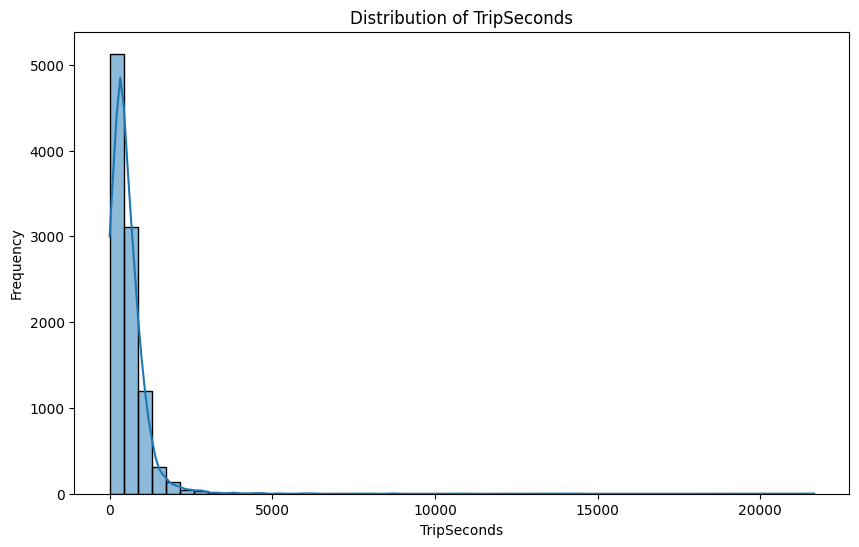

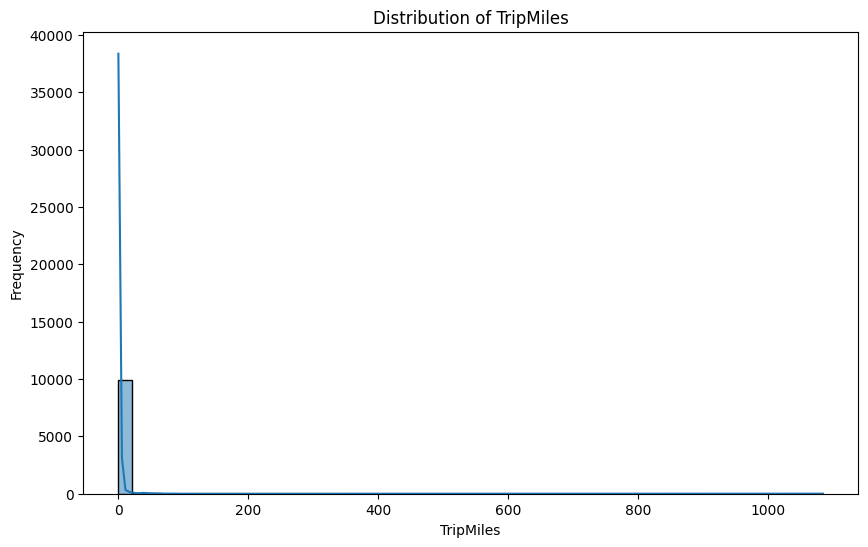

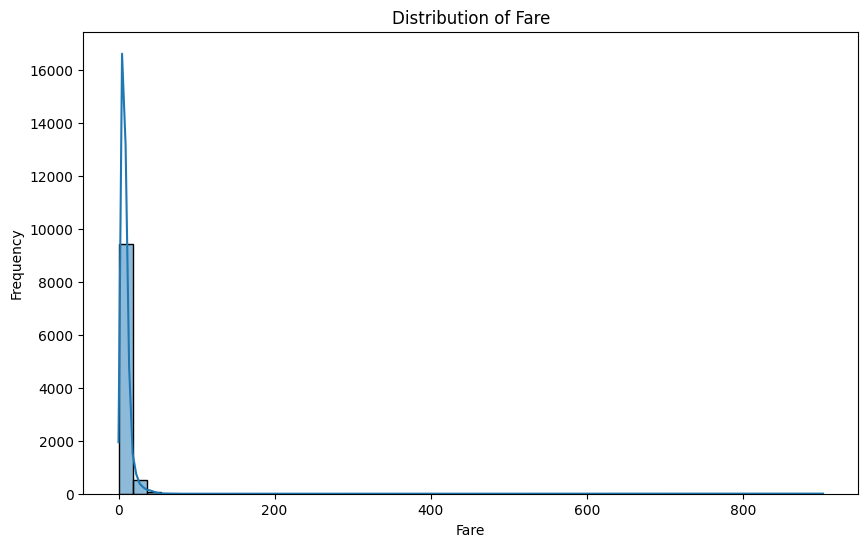

In [11]:
# Visualization of numerical features distributions
numerical_features = ['TripSeconds', 'TripMiles', 'Fare']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Cell 6: Visualizations - Categorical Features

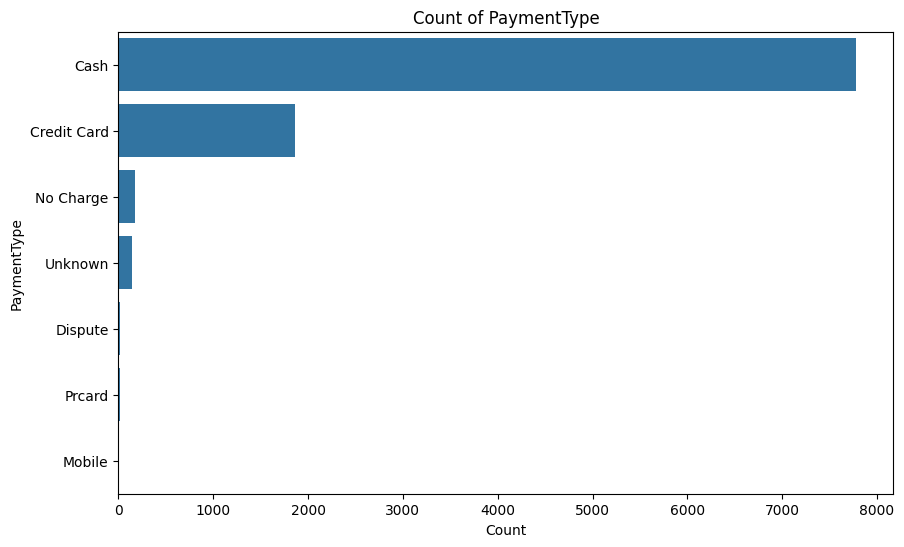

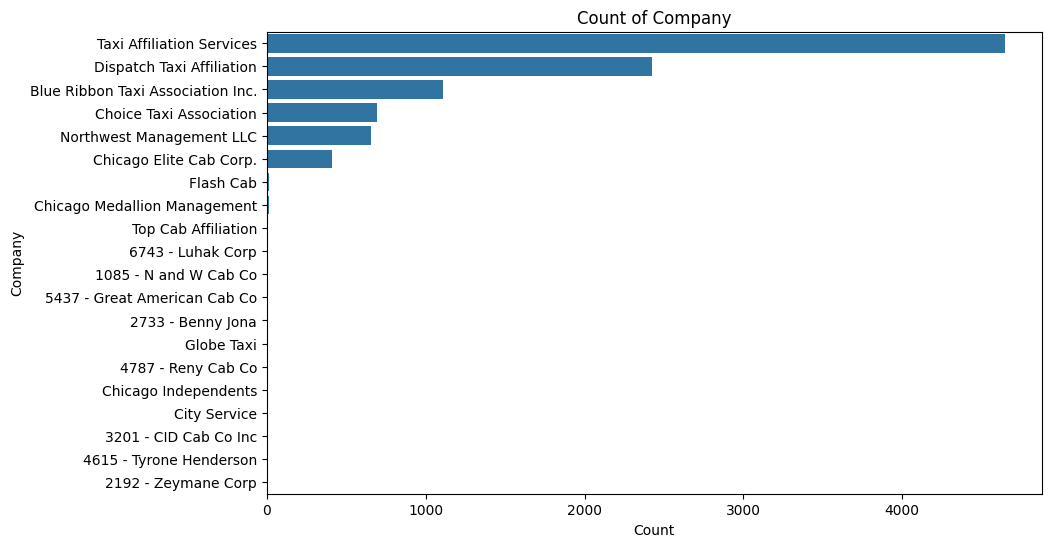

In [12]:
# Visualization of categorical features count
categorical_features = ['PaymentType', 'Company']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

# Cell 7: Scatter Plots for Exploring Relationships

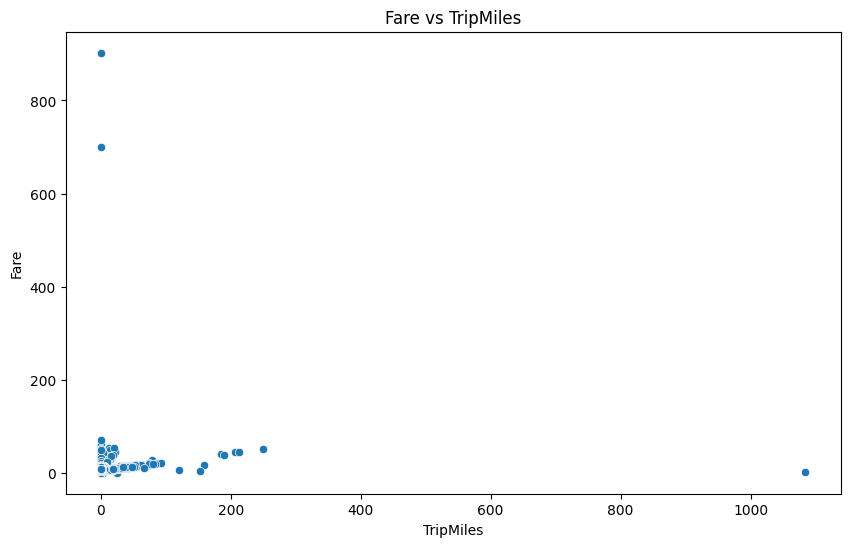

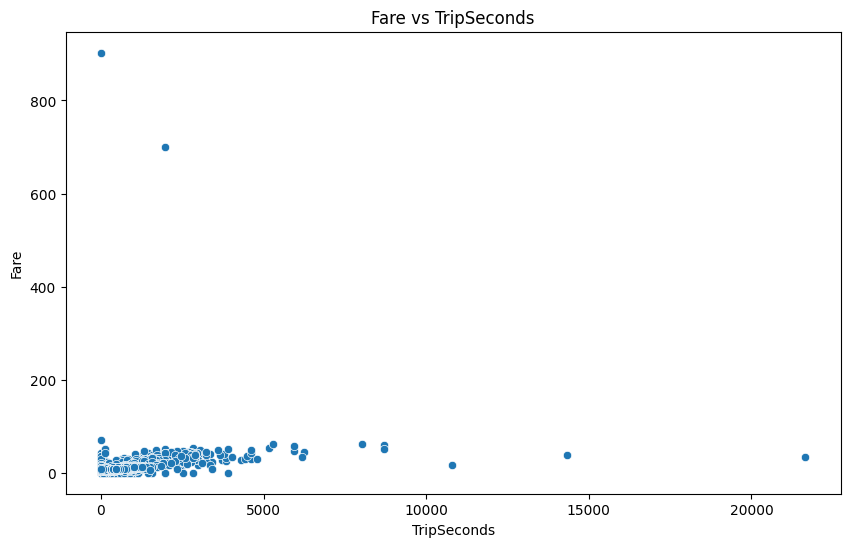

In [13]:
# Scatter plot to explore the relationship between TripMiles and Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TripMiles', y='Fare', data=df)
plt.title('Fare vs TripMiles')
plt.xlabel('TripMiles')
plt.ylabel('Fare')
plt.show()

# Scatter plot to explore the relationship between TripSeconds and Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TripSeconds', y='Fare', data=df)
plt.title('Fare vs TripSeconds')
plt.xlabel('TripSeconds')
plt.ylabel('Fare')
plt.show()

# Cell 8: Box Plot for Detecting Outliers

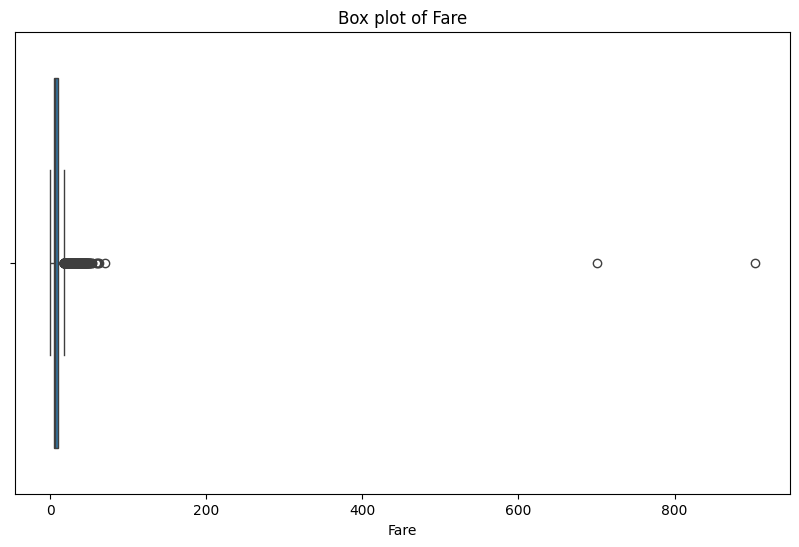

In [14]:
# Box plot to detect outliers in Fare
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fare', data=df)
plt.title('Box plot of Fare')
plt.xlabel('Fare')
plt.show()

### Explanations

- **Cell 1**: Imports the necessary libraries and initializes the BigQuery client.
- **Cell 2**: Defines the SQL query to extract the relevant data from the BigQuery dataset. It then executes the query and loads the results into a pandas DataFrame. Finally, it displays the first few rows to confirm that the data was loaded correctly.
- **Cell 3**: Displays basic statistics of the dataset using `df.describe()`.
- **Cell 4**: Analyzes the missing values in each column and prints the results.
- **Cell 5**: Creates histograms for the numerical features (`TripSeconds`, `TripMiles`, `Fare`) using seaborn for visualization.
- **Cell 6**: Visualizes the count of categorical features (`PaymentType`, `Company`) using count plots.
- **Cell 7**: Creates scatter plots to explore the relationships between `TripMiles` and `Fare`, and `TripSeconds` and `Fare`.
- **Cell 8**: Generates box plots to detect outliers within the `Fare` variable.

With this notebook, you will have a comprehensive analysis of the taxi trips data from BigQuery, including basic statistics, missing values analysis, and various visualizations to understand the data distribution and relationships.